**PROYECTO FINAL DE INTELIGENCIA ARTIFICIAL - PUJ 2023**

Alumno: Libardo Andres Carpio Sepulveda
Ingeniero: Francisco Calderon PhD.

**Ver. 1.0.4** Este proyecto se enfoca en desarrollar un modelo de estimación de precios para objetos usados (como ejemplo usaremos carrros / usando una base de datos de kaggle muy famosa y trabajada por su buena estructura y facilidad de entendimiento), que tenga en cuenta las características y condiciones del mismo. El objetivo final es encontrar el equilibrio entre un precio justo y la rapidez de venta del objeto, trayendo datos del mercado y así brindar a los propietarios una herramienta confiable para tomar decisiones informadas sobre el precio de su objeto en este caso, un automovil.

Base de datos: https://www.kaggle.com/datasets/danielkyrka/bmw-pricing-challenge

In [304]:
# Primero realizamos la importación de cada una de las librerías que creemos que vamos a usar
# y con el proceso de desarrollo de nuestro proyecto iremos agregando las que se necesiten de 
# modo que cuanso acabemos, en esta sección queden todas las importaciones de librerías.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [305]:
# Sabemos que el precio de un carro comercial se basa principalmente en el  
# kilometraje y el tipo de motor que tiene, por lo que  comenzamos a realizar 
# una limpieza y pre-procesado de nuestros datos

#******************************************************************************#
# Realizamos la lectura de nuestra base de datos
BBDD = pd.read_csv('bmw_pricing_challenge.csv')
#******************************************************************************#



#******************************************************************************#
# Vamos a comenzar la limpieza básica, donde tomaremos como primeros datos a limpiar
# el motor y el kilometraje, pues debemos asegurarnos que no son numeros negativos

# Se crea una condición booleana en la variable 'Clean_Motor' que evalúa si el valor 
# de la columna 'engine_power' en el DataFrame 'BBDD' es mayor que 1 (Positiva y
# teniendo en cuenta que el valor mínimo de un motor de automovil es 1000c.c.).

Clean_Motor = BBDD['engine_power'] > 1  
datos = BBDD [Clean_Motor]

# La variable 'Clean_Motor' contendrá una serie booleana con True en las posiciones
# donde se cumple la condición y False donde no.\


# Por último, se filtran los datos en el DataFrame 'BBDD' utilizando la condición 
# booleana 'Clean_Motor'. La variable 'datos' contendrá únicamente las filas del 
# DataFrame 'BBDD' donde la condición 'Clean_Motor' sea True, es decir, donde el 
# motor tenga un valor válido. Esto se hace para eliminar los registros con motores 
# inválidos del conjunto de datos y obtener un subconjunto limpio y procesado para 
# su posterior análisis.

Clean_Motor = datos['mileage'] > 1 
datos = datos [Clean_Motor]
# Se buscan datos NULL y se suman por categorías
datos.isnull().sum()
#******************************************************************************#


maker_key            0
model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
price                0
sold_at              0
dtype: int64

Text(0.5, 1.0, 'Distribución de los precios de autos Usados')

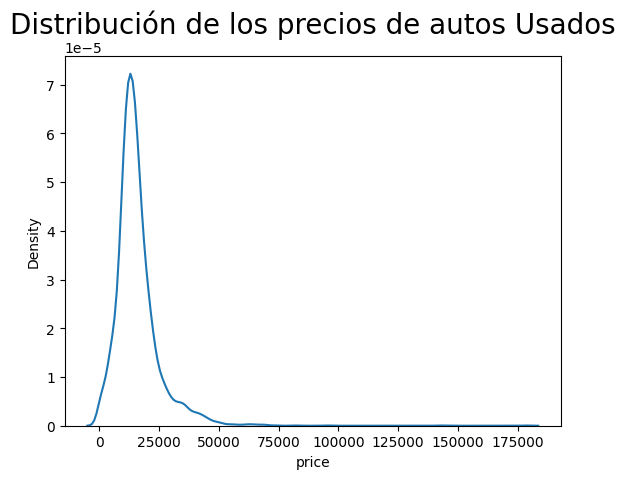

In [306]:
#******************************************************************************#
# Ya que tenemos una limpieza inicial de los datos, podemos proceder a realizar
# una primera visualización de los mismos y de esta forma comenzar a determinar 
# los outlaiers de nuestra Base de Datos (BBDD)

# se utiliza la biblioteca 'seaborn' y la función 'kdeplot' para trazar la distribución
# de precios. Se pasa el argumento 'data=datos' para indicar que los datos a visualizar
# son el subconjunto limpio y procesado 'datos', y el argumento 'x='price'' indica que 
# se utilizará la columna 'price' del DataFrame 'datos' como variable en el eje x. 
# Esto generará un gráfico de densidad (kde plot) que muestra la distribución de precios de los automóviles.

sns.kdeplot(data=datos, x='price')
plt.title('Distribución de los precios de autos Usados', size=20)

#******************************************************************************#

Text(0.5, 1.0, 'Distribución de Kilometraje en autos Usados')

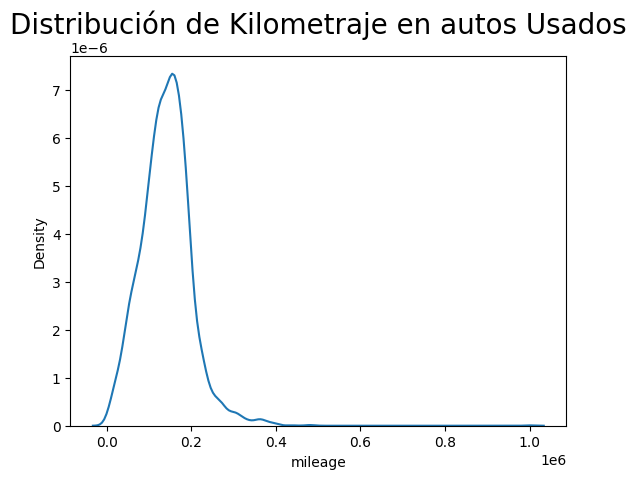

In [307]:
#***************************************************************************************#
# Observando la grafica anterior, podemos decir que la mayor cantidad de precios se
# concentran en valores hasta más o menos los 60000 USD, por lo que podemos considerar
# que los demás precios son valores atípicos y podemos descartarlos.

# Nuestra cariable Precio_acotado contendrá una serie booleana con True en las posiciones donde el precio sea mayor a 
# 60000 y False donde no lo sea.
Precio_acotado = BBDD['price'] > 60000
# Contamos, cuántos registros cumplen con la condición de tener un precio menor a 60000.


# Distribucion de kilometraje
sns.kdeplot(data=datos, x='mileage')
plt.title('Distribución de Kilometraje en autos Usados', size=20)
#***************************************************************************************#

Text(0.5, 1.0, 'Distribution of engine power')

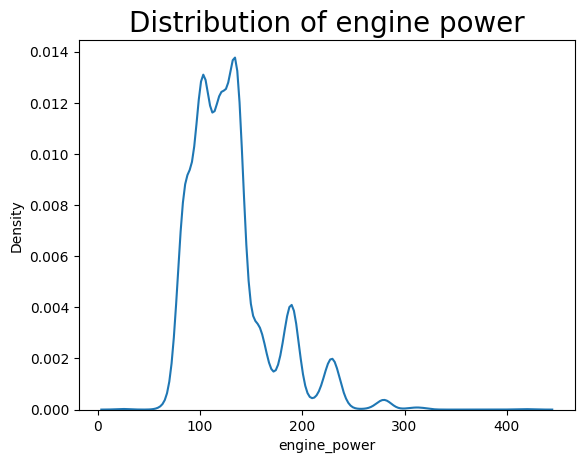

In [308]:
#******************************************************************************#
# Observando la grafica anterior podemos ver que la mayor parte del kilometraje de los 
# autos se encuentra concentrada antes de los 40.000 millas (64373.76 Km)

# Ahora generamos la grafica de como se distribuye la densidad del tipo de motor en 
# todo nuestro conjunto de datos para ver si es necesario considerar algunos outlaiers,
# como vemos, la mayor concentración de nuestros motores se encuentran entre 70 y 300
# por lo que procedemos a eliminaros.
sns.kdeplot(data=datos, x='engine_power')
plt.title('Distribution of engine power', size=20)

In [309]:
#*****************************************************************************************************************#
Max_price = 60000
# creamos una condición booleana en la variable 'Band_price' que evalúa si el valor de la columna 'price'
# en el DataFrame 'datos' es menor que 'Max_price' definido anteriormente. Esto se hace para identificar 
#los registros que tienen un precio por debajo de 60000 y marcarlos como True en la serie booleana 'Band_price'. 
# Los registros que no cumplen esta condición tendrán el valor False en la serie.
# En la tercera línea, se utiliza la condición booleana 'Band_price' para filtrar el DataFrame 'datos',
# manteniendo solo los registros donde la condición es True. Esto eliminará los registros con valores 
# de precio superiores a 60000, eliminando los outliers superiores.
Band_price = datos['price'] < Max_price
datos = datos [Band_price]

# Definimos una variable a la que le asignaremos un valor considerado detro de valores típicos, la cual usaremos 
# para colocar el tope a nuestra BBDD y poder eliminar los outliers o valores atipicos que presentamos.
Max_Km = 400000
Band_Km = datos['mileage'] < Max_Km # La columna de 'mileage' tomara un valor booleano dependiendo de si cumple 
# la condición o no.
datos = datos [Band_Km]
# Procedemos a eliminar las filas donde no se cumpió la condición y mantenemos las de un valor == True

#*****************************************************************************************************************#

In [310]:
#*****************************************************************************************************************#
# Aplicamo filtros adicionales para eliminar outliers en los valores de potencia del motor en el DataFrame 'datos', 
# manteniendo únicamente los registros que cumplen con los criterios establecidos.

Engine_top = 300 # Valor maximo típico de la potencia del motor
Engine_min = 80  # Valor mínimo típico de la potencia del motor

Band_Engine_Top = datos['engine_power'] < Engine_top # Booleano a la fila que cumpla la condición
datos = datos [Band_Engine_Top] # Dejamos solo las filas que tienen un valor igual a True

Band_Engine_Bottom = datos['engine_power'] > Engine_min # Booleano a la fila que cumpla la condición
datos = datos [Band_Engine_Bottom] # Dejamos solo las filas que tienen un valor igual a True

#filas, columnas = datos.shape
#*****************************************************************************************************************#

In [311]:
#precio_promedio = round(datos.price.mean(), 2)
# obtener el vector de precios
#precio = datos.price


#datos.describe().round(2)#count, mean, desviaacion estadndar, min, P25%, P50%, P75%, max (datos numéricos)




Fin de Pre-procesado y limpieza de datos

In [312]:

#plt.figure(figsize=(12,6))
#sns.kdeplot(data=BBDD, x='price')
#plt.title('Distribution of Price', size=20)


<ipython-input-313-a8cca1b714cd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = datos.corr()


<Axes: >

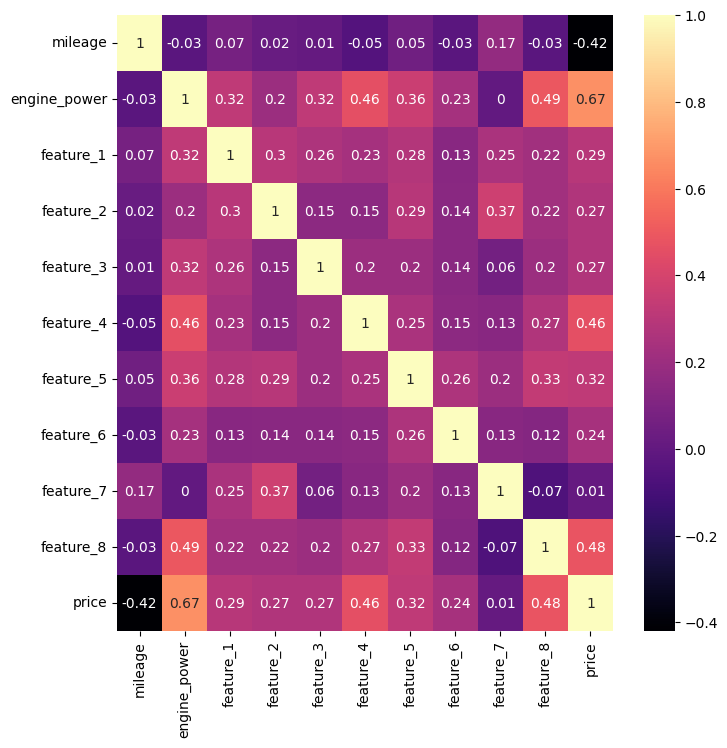

In [313]:
# Ahora procedemos a obtener la correlación de nuestros datos: 
correlacion = datos.corr()
# Para poder visualizar con mayor facilidad que caracteristicas de nuestros datos tienen mayor
# correlación, hacemos un grafico de calor, sobre el cual esperamos poder ver dos relaciones 
# importantes, la primera, poder ver que el precio es inversamente proporcional al kilometraje
# y de igual forma esperamos ver la correlación direactamente proporcional entre el motor y su precio.
plt.figure(figsize=(8,8))
sns.heatmap(round(correlacion, 2),cmap='magma', annot=True)

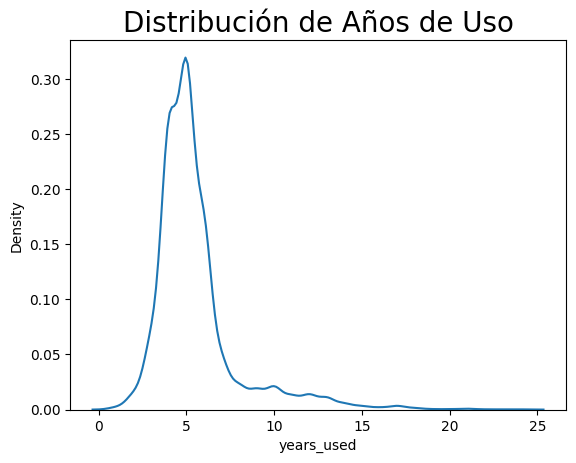

In [314]:
# A continuació seguimos realizando la limpieza de datos para saber su relevancia y elimar muchos mas outliders
# Por lo que procedemos iniciando a calcular los años de uso del vehículo
# como de momento son solo texto procedemos darle formato fecha a las columnas que las contienen
datos['registration_date']= pd.to_datetime(datos['registration_date'])
datos['sold_at']= pd.to_datetime(datos['sold_at'])
# Extraemos las fechas de venta y fechas registro, para poder calcular los años de uso de cada vehículo
datos['sold_year']= datos['sold_at'].dt.year
datos['registration_year']= datos['registration_date'].dt.year
datos['years_used']= datos['sold_year'] - datos['registration_year']


sns.kdeplot(data=datos, x='years_used')
plt.title('Distribución de Años de Uso', size=20)

# analizando la distribucion de los años de uso, se puede observar que arriba 15 hay muy pocos datos y los datos llegan hasta 25, por lo tanto a los valores arriba de 15 se les puede considerar outlayers
superior = 15
Filtro_outlayer_superior_years_used = datos['years_used'] < superior # filtro usado para eliminar outlayer superiores
datos = datos [Filtro_outlayer_superior_years_used]

In [315]:
# Analizando la distribucion de los años de uso, se puede observar que arriba 15 hay muy pocos datos y los datos llegan hasta 25, por lo tanto a los valores arriba de 15 se les puede considerar outlayers
#superior = 15
#Filtro_outlayer_superior_years_used = datos['years_used'] < superior # filtro usado para eliminar outlayer superiores
#datos = datos [Filtro_outlayer_superior_years_used]

<ipython-input-316-aa25d88f2e9e>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = datos.corr()


<Axes: >

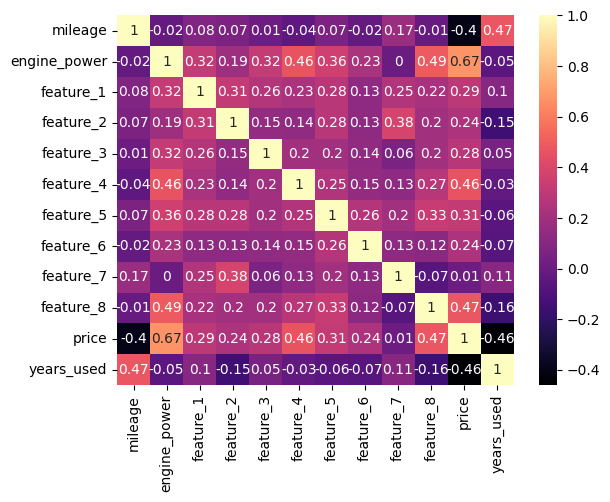

In [316]:
# Ahora procedemos a eliminar todas las características que ya no serán necesarias para realizar nuestro pronóstico
# Procedemos la fecha de registro, fecha de venta, año de venta, marca y año de registro.
del datos['registration_date']
del datos['sold_at']
del datos['sold_year']
del datos['registration_year']
del datos['maker_key']

# Una vez elimindas estas caracteristias, procedemos a graficar la correlación con las caracteristicas que hemos dejado.
correlacion = datos.corr()
# Nuevamente procedemos a graficar la correlación por medio de otro mapa de calor y tener visualización. 
sns.heatmap(round(correlacion, 2),cmap='magma', annot=True)

<ipython-input-317-e366f493816f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['model_key'][i] = datos['model_key'][i].replace(" Gran Coupé","2")
<ipython-input-317-e366f493816f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['model_key'][i] = datos['model_key'][i].replace(" Gran Tourer","3")
<ipython-input-317-e366f493816f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['model_key'][i] = datos['model_key'][

<Axes: >

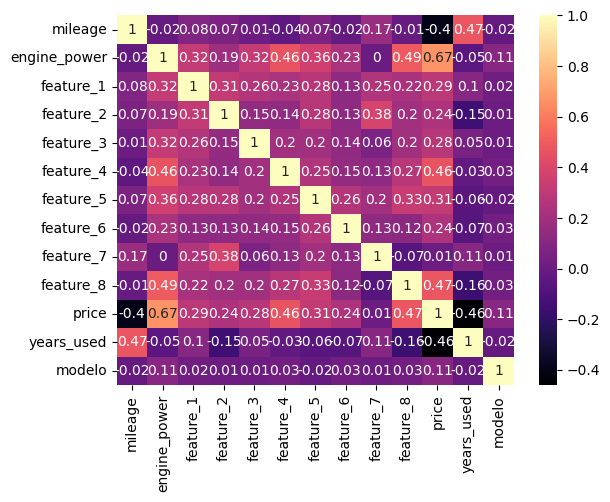

In [317]:
# De nuevo procedemos a realizar limpieza de datos
# Realizamos una limpieza de la columna 'model_key' en el DataFrame 'datos', reemplazando
# y estandarizando los valores de acuerdo con las sustituciones específicas realizadas con
# el fin de volver numêrica nuestra base de datos. 
# También se crea una nueva columna 'modelo' con los valores convertidos a tipo numérico.

Data_engine = datos['engine_power'] >= 1
marca = datos['model_key'].value_counts()
F_todos = datos['model_key'][Data_engine]

for i in F_todos.index:
    datos['model_key'][i] = datos['model_key'][i].replace(" Gran Turismo","1")
    datos['model_key'][i] = datos['model_key'][i].replace(" Gran Coupé","2")
    datos['model_key'][i] = datos['model_key'][i].replace(" Gran Tourer","3")
    datos['model_key'][i] = datos['model_key'][i].replace(" Active Tourer","4")
    datos['model_key'][i] = datos['model_key'][i].replace("ActiveHybrid 5","5")
    datos['model_key'][i] = datos['model_key'][i].replace("M","6")
    datos['model_key'][i] = datos['model_key'][i].replace(" M","7")
    datos['model_key'][i] = datos['model_key'][i].replace("X","8")
    datos['model_key'][i] = datos['model_key'][i].replace("Z","9")
    datos['model_key'][i] = datos['model_key'][i].replace("i","10")
    datos['model_key'][i] = datos['model_key'][i].replace(" ","11")
    
marca = datos['model_key'].value_counts()
datos['modelo'] = pd.to_numeric(datos['model_key'])
del datos['model_key'] # Eliminamos la columna de model key, pues no es de valor numerico


# Volvemos a realizar la correlación de nuestros datos para ver como ha mejorado nuestro procesamiento.
correlacion = datos.corr()
# Una vez más, graficamos sobre un mapa de calor
sns.heatmap(round(correlacion, 2),cmap='magma', annot=True)



In [318]:
# Ahora procedemos a analizar la característica de combustible, como son solo 4 valores,
# procedemos a ver numericamente que tan lejos se encuentra el uno del otro, y así poder
# determinar si estan distribuidos casi por igual sobre el conjunto de datos, o se concentra
# en algunos de ellos.
print (datos['fuel'].value_counts())
# como observamos que la mayoria se concentra en "Diesel" no vale la pena analizar o caracterizar esta
# columna por lo que procedemos a eliminarla. 
del datos['fuel']

# como todos los carros son de la misma marca, se elimina esta columna
# se pasan los datos booleanos a 0 o 1
datos['feature_1']=datos['feature_1'].astype('int')
datos['feature_2']=datos['feature_2'].astype('int')
datos['feature_3']=datos['feature_3'].astype('int')
datos['feature_4']=datos['feature_4'].astype('int')
datos['feature_5']=datos['feature_5'].astype('int')
datos['feature_6']=datos['feature_6'].astype('int')
datos['feature_7']=datos['feature_7'].astype('int')
datos['feature_8']=datos['feature_8'].astype('int')

diesel           4565
petrol            148
hybrid_petrol       3
electro             1
Name: fuel, dtype: int64


In [321]:
# Teniendo en cuenta que nos quedan aun variables categoricas procedemos a volverlas variables numericas para que nos 
# afecten en el momento de hacer nuestra predicción
datos= pd.get_dummies(datos,columns=['paint_color', 'car_type'],drop_first=True)
datos= pd.get_dummies(datos,drop_first=True)
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4717 entries, 0 to 4842
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   mileage              4717 non-null   int64
 1   engine_power         4717 non-null   int64
 2   feature_1            4717 non-null   int64
 3   feature_2            4717 non-null   int64
 4   feature_3            4717 non-null   int64
 5   feature_4            4717 non-null   int64
 6   feature_5            4717 non-null   int64
 7   feature_6            4717 non-null   int64
 8   feature_7            4717 non-null   int64
 9   feature_8            4717 non-null   int64
 10  price                4717 non-null   int64
 11  years_used           4717 non-null   int64
 12  modelo               4717 non-null   int64
 13  paint_color_black    4717 non-null   uint8
 14  paint_color_blue     4717 non-null   uint8
 15  paint_color_brown    4717 non-null   uint8
 16  paint_color_green    471

**Iniciamos con el modelo de predicción**

In [322]:
# Comenzamos a pasarle las caracteristicas a nuestro modelo de entrenamiento, 
# y de igual forma las estiquertas que corresponden
X = datos.drop('price', axis=1)
Y = datos.price

#Al ejecutar estas líneas de código, se obtendrán los conjuntos de entrenamiento 
# y prueba para las características y las etiquetas, que se utilizarán posteriormente 
# para entrenar y evaluar un modelo de aprendizaje automático.
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, train_size=0.85, random_state=5)

**Utilizamos el modelos de Regresión Lineal**

In [323]:
# creamos una instancia del modelo de regresión lineal.
LReg = LinearRegression()
# Se ajusta el modelo utilizando los conjuntos 
LegReg = LReg.fit(X_train, Y_train)
# Se utiliza el modelo ajustado para hacer predicciones sobre los datos de prueba 
# en X_test. Se obtiene un vector de valores predichos para la variable dependiente.
Y_pred=LReg.predict(X_test)
# Se utiliza la función r2_score() de scikit-learn para calcular el coeficiente de
# determinación R^2, que indica la calidad de ajuste del modelo. Se compara los valores
# reales Y_test con los valores predichos Y_pred para evaluar la capacidad de predicción 
# del modelo.
R2=r2_score(Y_test , Y_pred)
print ('R2:',R2.round(5))

# Lo mismo pero con escalado
X_test_scaled2 = StandardScaler().fit_transform(X_test)
X_train_scaled2 = StandardScaler().fit_transform(X_train)
LReg2=LinearRegression()
LReg2.fit(X_train_scaled2,Y_train)
Y_pred2=LReg2.predict(X_test_scaled2)
R22 = r2_score(Y_test , Y_pred2)
print('R2:',R22.round(5))

# Al escalar las características antes de ajustar el modelo de regresión lineal, se 
# busca asegurar una mejor interpretación de los coeficientes, mejorar el rendimiento 
# del modelo y reducir la influencia de valores atípicos. 

R2: 0.72126
R2: 0.71981


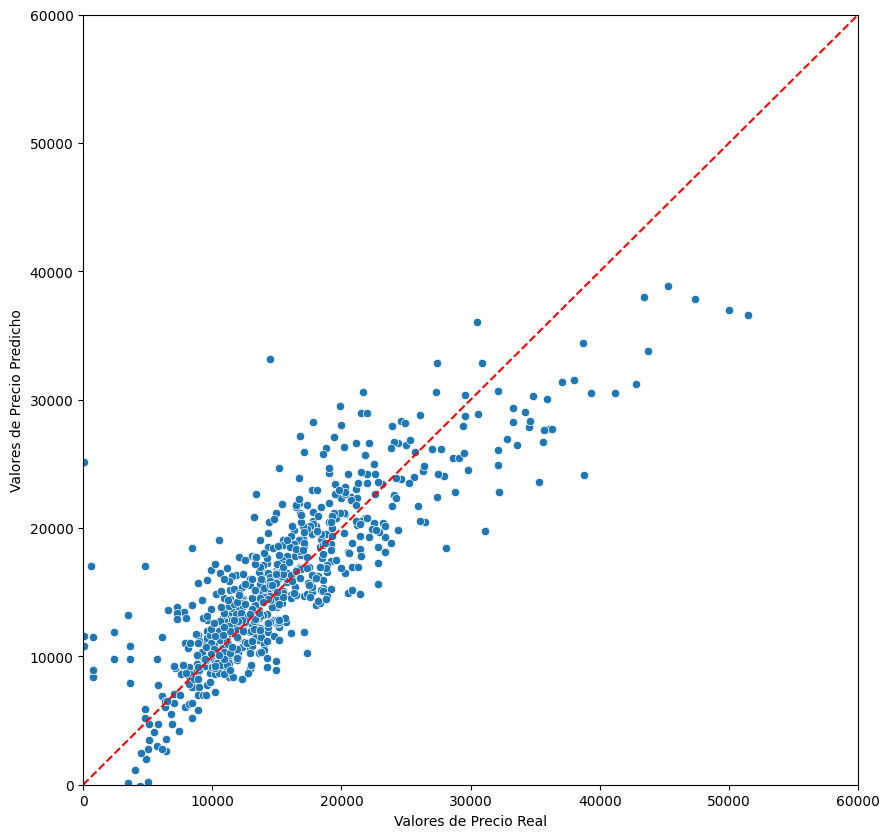

In [332]:
# generará un gráfico de dispersión que muestra cómo se comparan los valores reales 
# y los valores predichos del precio. La línea diagonal de referencia ayuda a evaluar 
# visualmente la precisión del modelo, ya que los puntos que se encuentran cerca de esta 
# línea indican una buena predicción.


plt.figure(figsize=(10,10))
sns.scatterplot(x=Y_test, y=Y_pred)
plt.xlabel('Valores de Precio Real')
plt.ylabel('Valores de Precio Predicho')
plt.xlim(0, 60000)
plt.ylim(0, 60000)
plt.plot([0, 60000], [0, 60000], color='red', linestyle='--')
plt.show()


**Utilizando el modelo de Random Forest**

R2: 0.8


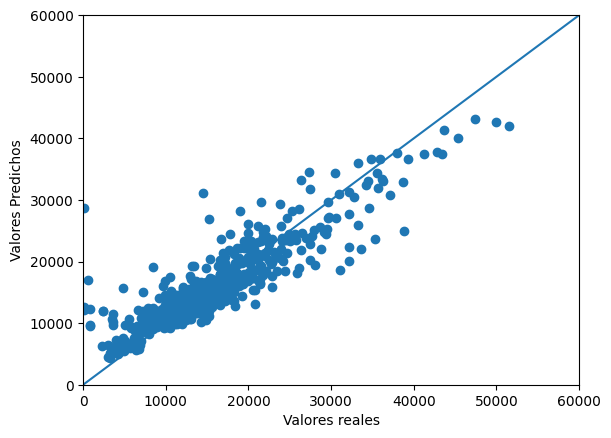

In [338]:
# Creamos y ajustamos un modelo de regresión basado en Random Forest con los parámetros especificados. 
# El modelo estará listo para hacer predicciones utilizando el conjunto de prueba.
from sklearn.ensemble import RandomForestRegressor
n_estimators=30
model = RandomForestRegressor(random_state=42,max_depth=7,max_features=9,n_estimators=n_estimators)
model.fit(X_train, Y_train)

# Obtenemos el valor de R^2 para el modelo de regresión basado en Random Forest. 
# Este valor indica la proporción de la varianza en los datos objetivo que puede ser
# explicada por el modelo. Un valor más cercano a 1 indica un mejor ajuste del modelo a los datos.
model_score = model.score(X_train,Y_train)
y_predicted = model.predict(X_test)
R2_DT = r2_score(Y_test, y_predicted)
print('R2:', R2_DT.round(3))


# generamos un gráfico de dispersión que muestra cómo se comparan los valores reales 
# y los valores predichos en el modelo de regresión. Los puntos dispersos representan 
# las muestras individuales y la línea diagonal proporciona una referencia de igualdad.

plt.scatter(Y_test, y_predicted)
plt.xlabel('Valores reales')
plt.ylabel('Valores Predichos')
lims = [0, 60000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)